In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


results_df = pd.read_csv("results/batch_run_results.csv")

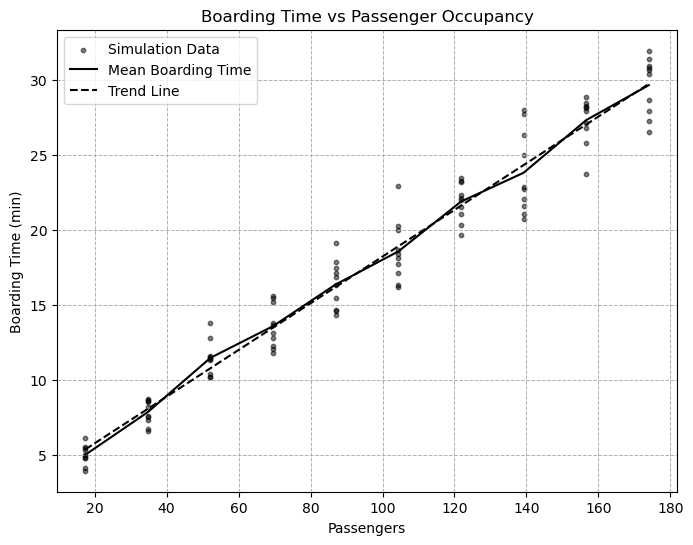

In [2]:
grouped = results_df.groupby("occupancy")["Time (s)"].mean()

passenger_counts = grouped.index * 174 
mean_boarding_times = grouped.values / 60 

#Plot Boarding Time vs Occupancy
plt.figure(figsize=(8, 6))
plt.scatter(
    results_df["occupancy"] * 174,
    results_df["Time (s)"] / 60,
    color="black",
    alpha=0.5,
    label="Simulation Data",
    s=10,
)

plt.plot(passenger_counts, mean_boarding_times, color="black", label="Mean Boarding Time")

trend = np.polyfit(results_df["occupancy"] * 174, results_df["Time (s)"] / 60, 1)
trendline = np.polyval(trend, passenger_counts)

plt.plot(passenger_counts, trendline, linestyle="--", color="black", label="Trend Line")
plt.title("Boarding Time vs Passenger Occupancy")
plt.xlabel("Passengers")
plt.ylabel("Boarding Time (min)")
plt.grid(True, linestyle="--", linewidth=0.7)
plt.legend()
plt.show()


In [7]:
from scipy.stats import linregress
def bootstrap_slopes(df, x_name, y_name , x_multiplyer = 1,  y_multiplyer= 1, n_iterations=10000):
    slopes = []
    for _ in range(n_iterations):
        sample = df.sample(frac=1, replace=True)
        slope, _, _, _, _ = linregress(sample[x_name] * x_multiplyer, sample[y_name] / y_multiplyer)
        slopes.append(slope)
    return np.array(slopes)

compare_df = pd.read_csv("comparison_data/scatter_soure.csv")
slopes1 = bootstrap_slopes(results_df, "occupancy", "Time (s)", x_multiplyer = 174,  y_multiplyer= 60)
slopes2 = bootstrap_slopes(compare_df, "people", "boarding time")

print(slopes2)
print(slopes1)
difference = slopes2 - slopes1
lower, upper = np.percentile(difference, [2.5, 97.5])

print(f"95% Confidence Interval for Slope Difference: [{lower:.4f}, {upper:.4f}]")

if lower <= 0 <= upper:
    print("The trends are statistically indistinguishable at 95% confidence.")
else:
    print("The trends differ at 95% confidence.")

[0.07422266 0.07087774 0.07516278 ... 0.07686729 0.07659836 0.07836747]
[0.15910934 0.15260468 0.15598469 ... 0.15489716 0.15434216 0.16021644]
95% Confidence Interval for Slope Difference: [-0.0863, -0.0711]
The trends differ at 95% confidence.


'\nplt.title("Boarding Time vs Passenger Occupancy")\nplt.xlabel("Passengers")\nplt.ylabel("Boarding Time (min)")\nplt.grid(True, linestyle="--", linewidth=0.7)\nplt.legend()\nplt.show()\n'

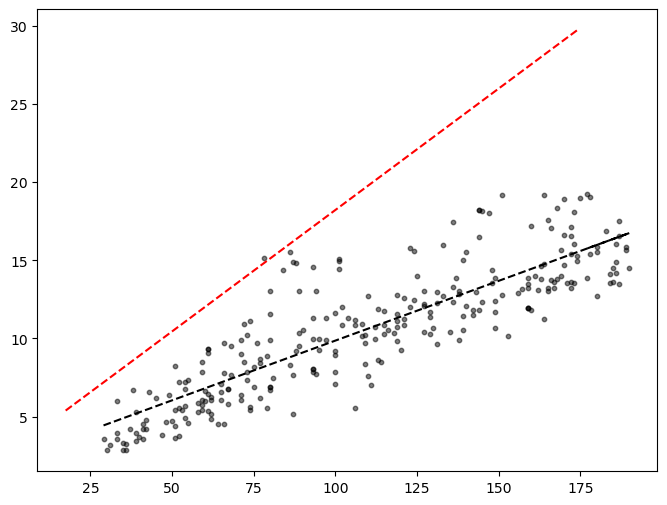

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(
    compare_df["people"],
    compare_df["boarding time"] ,
    color="black",
    alpha=0.5,
    label="real data",
    s=10,
)

#plt.plot(passenger_counts, mean_boarding_times, color="black", label="Mean Boarding Time")

trend = np.polyfit(compare_df["people"], compare_df["boarding time"] , 1)
trendline = np.polyval(trend, compare_df["people"])
plt.plot(compare_df["people"], trendline, linestyle="--", color="black", label="Trend Line")

trend = np.polyfit(results_df["occupancy"] * 174, results_df["Time (s)"] / 60, 1)
trendline = np.polyval(trend, passenger_counts)
plt.plot(passenger_counts, trendline, linestyle="--", color="red", label="Trend Line")
"""
plt.title("Boarding Time vs Passenger Occupancy")
plt.xlabel("Passengers")
plt.ylabel("Boarding Time (min)")
plt.grid(True, linestyle="--", linewidth=0.7)
plt.legend()
plt.show()
"""